In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split

from pprint import pprint as pp

pd.set_option('display.max_columns', 75)

%matplotlib inline

* load the data file
* we skip row 1 because it's a note that affects our headers.
* we only grab 235,629 rows because the last two rows are a single description in column 0.
* try it without each and see what happens.

In [2]:
dfLoanData = pd.read_csv('LoanStats3c.csv', skiprows=1, nrows=235629)

# It should still yell at us that the column 19 (aka 'desc') is also mixed type.
# so we drop that column - we're not using it anyway.
dfLoanData = dfLoanData.drop('desc', axis=1)

/Library/Python/2.7/site-packages/pandas/io/parsers.py:1164: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
dfLoanData['int_rate'] = dfLoanData.apply(lambda x: pd.Series(x['int_rate'].rstrip('%')).astype('float') / 100, axis=1)

In [5]:
dfLoanData.issue_d.head()

0    Dec-2014
1    Dec-2014
2    Dec-2014
3    Dec-2014
4    Dec-2014
Name: issue_d, dtype: object

In [9]:
# converts string to datetime object in pandas:
#dfLoanData['issue_d_format'] = pd.to_datetime(dfLoanData['issue_d']) 
#dfLoanData.issue_d_format.head()
#dfts = dfLoanData.set_index('issue_d_format') 
#year_month_summary = dfts.groupby(lambda x : x.year * 100 + x.month).count()
loan_count_summary = year_month_summary['issue_d']
loan_count_summary.set_index(
loan_count_summary.head()

201401    15628
201402    15269
201403    16513
201404    19071
201405    19099
Name: issue_d, dtype: int64

In [10]:
len(loan_count_summary)

12

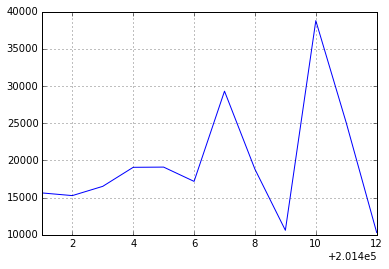

In [11]:
loan_count_summary.plot()

In [12]:
235000/12

19583